# Arquitectura, modelado y gestión de datos en Data Science
<hr />

## Semana 3 - Ejercicio práctico 3 - Grupo 10
### Realizado por:
💻 Mayra Cecilia Salazar Grandes   
💻 José Manuel Espinoza Bone

# 0️⃣ Inicializar ambiente

Aquí instalamos las dependencias externas que no se encuentran en la biblioteca estándar de Python para lograr que el presente notebook se puede ejecutar sin problemas.

In [ ]:
import sys
import subprocess
def RunCommand(commandList: list[str]):
    print("    ⏳ Ejecutando: ", " ".join(commandList))
    result = subprocess.run(commandList, stdout=subprocess.DEVNULL,stderr=subprocess.PIPE, text=True)
    if result.returncode != 0:
        print(result.stderr) # Si existió error, mostrar en la salida estándar.

print("🟦 Instalando las dependencias externas")
RunCommand([sys.executable, "-m", "pip", "install", "numpy"]) 
RunCommand([sys.executable, "-m", "pip", "install", "pandas"])
RunCommand([sys.executable, "-m", "pip", "install", "tabulate"])
RunCommand([sys.executable, "-m", "pip", "install", "matplotlib"])
RunCommand([sys.executable, "-m", "pip", "install", "seaborn"])
RunCommand([sys.executable, "-m", "pip", "install", "requests"])
RunCommand([sys.executable, "-m", "pip", "install", "openpyxl"]) 

#Importando las dependencias
import pandas 
import pandas as pd
import numpy 
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn
import requests
from tabulate import tabulate
import datetime

🟦 Instalando las dependencias externas
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install numpy
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install pandas
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install tabulate
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install matplotlib
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install seaborn
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install requests
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install openpyxl
    ⏳ Ejecutando:  c:\Users\mcsal\AppData\Local\Programs\Python\Python313\python.exe -m pip install plotly


# 1️⃣ Importar Dataset

In [68]:
# Descarga de archivos, lectura y combinación con pandas
oil_spill_uri = "https://www.kaggle.com/datasets/ashrafkhan94/oil-spill/data"
df_original= pd.read_csv ("D:/Descargas/oil-spill.csv",header=None)
print("🟦 Descargando orígenes de datos")

🟦 Descargando orígenes de datos


In [36]:
#print(df_original.head())
#df_original.describe()
print(df_original.columns.tolist())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [69]:
pandas.set_option("display.max_columns", None)

## Función para mostrar la información del DataFrame
def ShowTableInfo(df:pandas.DataFrame, title):
    display(f"ℹ️ Información de DataFrame: {title} ℹ️")
    df.info()
    display()

# Función para mostrar las n primeras filas del DataFrame.
def ShowTableHead(df:pandas.DataFrame, headQty=10):
    display(f"ℹ️ Primeros {headQty} elementos.")
    display(df.head(headQty))
    display()

# Función para mostrar las n últimas filas del DataFrame.
def ShowTableTail(df:pandas.DataFrame, tailQty=10):
    display(f"ℹ️ Últimos {tailQty} elementos.")
    display(df.tail(tailQty))
    display()

# Función para mostrar la estadística descriptiva de todas las columnas del DataFrame, por tipo de dato.
def ShowTableStats(df: pandas.DataFrame):
    display("ℹ️ Estadística descriptiva del DataFrame")
    # 🔢 Columnas numéricas: incluye tipos numpy y extension types de pandas
    print("    🔢 Columnas numéricas")
    numeric_types = ['int64', 'float64', 'Int64', 'Float64']
    numeric_cols = df.select_dtypes(include=numeric_types)
    
    if not numeric_cols.empty:
        numeric_desc = numeric_cols.describe().round(2)
        print(tabulate(numeric_desc, headers='keys', tablefmt='fancy_grid'))
    else:
        print("    ❌ No hay columnas numéricas.")
 
 # 🔡 Columnas no numéricas
    print("    🔡 Columnas no numéricas")
    non_numeric_types = ['object', 'string', 'bool', 'category']
    non_numeric_cols = df.select_dtypes(include=non_numeric_types)
    if not non_numeric_cols.empty:
        non_numeric_desc = non_numeric_cols.describe()
        print(tabulate(non_numeric_desc, headers='keys', tablefmt='fancy_grid'))
    else:
        print("    ❌ No hay columnas no numéricas.")

 # 📅 Columnas de fecha
    print("    📅 Columnas fechas")
    datetime_cols = df.select_dtypes(include=['datetime'])
    if not datetime_cols.empty:
        datetime_desc = datetime_cols.describe()
        print(tabulate(datetime_desc, headers='keys', tablefmt='fancy_grid'))
    else:
        print("    ❌ No hay columnas de tipo fecha.")

# Función para mostrar los valores nulos o NaN de cada columna en un DataFrame
def ShowNanValues(df: pandas.DataFrame):
    display(f"ℹ️ Contador de valores Nulos/NaN")
    display(df.isnull().sum())
    display()


In [70]:
df_Main= df_original.copy()
ShowTableInfo(df_Main, "Análisis Exploratorio".upper())
ShowTableStats(df_Main)
ShowTableHead(df_Main)
ShowNanValues(df_Main)

'ℹ️ Información de DataFrame: ANÁLISIS EXPLORATORIO ℹ️'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       937 non-null    int64  
 1   1       937 non-null    int64  
 2   2       937 non-null    float64
 3   3       937 non-null    float64
 4   4       937 non-null    int64  
 5   5       937 non-null    float64
 6   6       937 non-null    float64
 7   7       937 non-null    float64
 8   8       937 non-null    float64
 9   9       937 non-null    float64
 10  10      937 non-null    float64
 11  11      937 non-null    float64
 12  12      937 non-null    float64
 13  13      937 non-null    float64
 14  14      937 non-null    float64
 15  15      937 non-null    float64
 16  16      937 non-null    float64
 17  17      937 non-null    float64
 18  18      937 non-null    float64
 19  19      937 non-null    float64
 20  20      937 non-null    float64
 21  21      937 non-null    float64
 22  22

'ℹ️ Estadística descriptiva del DataFrame'

    🔢 Columnas numéricas
╒═══════╤════════╤══════════╤═════════╤═════════╤════════╤══════════════════╤════════╤════════╤═══════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤═════════╤═════════╤════════╤════════╤════════╤════════╤══════╤════════╤═════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤═════════╤══════════╤════════╤════════╤════════╤════════╤══════════╤══════════╤═════════╤═════════╤════════╤════════╤══════════╤════════╤════════╤════════╕
│       │      0 │        1 │       2 │       3 │      4 │                5 │      6 │      7 │         8 │      9 │     10 │     11 │     12 │     13 │     14 │     15 │      16 │      17 │     18 │     19 │     20 │     21 │   22 │     23 │      24 │     25 │     26 │     27 │     28 │     29 │     30 │     31 │     32 │     33 │      34 │       35 │     36 │     37 │     38 │     39 │       40 │       41 │      42 │      43 │     44 │     45 │       46 │     47 │     48 │     49

'ℹ️ Primeros 10 elementos.'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,86.0,0.18,0.25,0.53,0.15,0.38,55.25,29.21,2.01,0.16,0.22,87.65,0,0.51,132.78,-0.01,3.78,0.57,3.34,-3.89,-0.25,1.96,0.0,1.96,12,720,0.01,18.26,89,69,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000.0,41.53,6.24,3660.0,0.15,79.2,0.21,0.30,0.49,0.14,0.35,207.31,21.67,1.87,0.17,0.27,87.65,0,0.47,132.78,-0.01,3.78,0.10,2.57,-3.50,-0.09,1.95,0.0,1.95,36,2070,0.01,46.19,89,69,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500.0,51.67,0.83,1810.0,0.02,78.7,0.02,0.03,0.07,0.02,0.05,5717.00,1678.13,2.32,0.02,0.03,87.65,0,0.59,132.78,-0.01,3.78,-0.07,3.34,-2.01,-0.40,1.95,0.0,1.95,18,1170,0.01,22.99,89,69,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000.0,38.90,5.89,3720.0,0.15,126.3,0.19,0.24,0.38,0.09,0.29,125.35,49.55,1.75,0.14,0.19,87.65,0,0.44,132.78,-0.01,3.78,0.89,6.30,-3.58,-0.59,2.19,0.0,2.19,43,2610,0.01,29.44,89,69,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000.0,41.22,7.90,1850.0,0.19,86.5,0.19,0.25,0.36,0.12,0.24,64.34,22.56,1.85,0.19,0.25,87.65,0,0.47,132.78,-0.01,3.78,-0.51,1.86,-1.39,-0.63,2.20,0.0,2.20,17,1080,0.01,21.39,89,69,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


'ℹ️ Contador de valores Nulos/NaN'

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64

# 2️⃣ Valores únicos
      ✅Identifica cuántas y cuales columnas tienen valores únicos. 
      ✅Eliminalas e imprime el tamaño del dataset antes y después 

In [138]:
# Tamaño original dataset
tamaño_antes = df_Main.shape
# Identificar columnas con un solo valor único
columnas_valor_unico = [col for col in df_Main.columns if df_Main[col].nunique() == 1]
print("Columnas con un solo valor único:")
print(columnas_valor_unico)
print(f"Total de columnas: {len(columnas_valor_unico)}\n")
# Eliminar esas columnas
df_eliminado = df_Main.drop(columns=columnas_valor_unico)
# Tamaño final
tamaño_despues = df_eliminado.shape

# Mostrar tamaños
print(f"Tamaño original del dataset: {tamaño_antes}")
print(f"Tamaño después de eliminar columnas con un único valor: {tamaño_despues}")

Columnas con un solo valor único:
['Característica_22']
Total de columnas: 1

Tamaño original del dataset: (937, 50)
Tamaño después de eliminar columnas con un único valor: (937, 49)


# 3️⃣ Analizar porcentajes
✅ Porcentaje de valores únicos por columna                                            
✅ Define límite de incidencia                           
✅ Identificar columnas por debajo de ese umbral y eliminarlas mostrando su porcentaje


In [ ]:
# Porcentaje de valores únicos por columna 
print ("Porcentaje de valores únicos por columna \n")
for col in df_Main.columns:
    total = df_Main[col].shape[0]
    unicos = df_Main[col].nunique()
    porcentaje = (unicos / total) * 100
    # Impresión valores únicos por columna 
    print(f"{col}: {unicos} valores únicos → {porcentaje:.2f}% del total")

Porcentaje de valores únicos por columna 

Característica_0: 238 valores únicos → 25.40% del total
Característica_1: 297 valores únicos → 31.70% del total
Característica_2: 927 valores únicos → 98.93% del total
Característica_3: 933 valores únicos → 99.57% del total
Característica_4: 179 valores únicos → 19.10% del total
Característica_5: 375 valores únicos → 40.02% del total
Característica_6: 820 valores únicos → 87.51% del total
Característica_7: 618 valores únicos → 65.96% del total
Característica_8: 561 valores únicos → 59.87% del total
Característica_9: 57 valores únicos → 6.08% del total
Característica_10: 577 valores únicos → 61.58% del total
Característica_11: 59 valores únicos → 6.30% del total
Característica_12: 73 valores únicos → 7.79% del total
Característica_13: 107 valores únicos → 11.42% del total
Característica_14: 53 valores únicos → 5.66% del total
Característica_15: 91 valores únicos → 9.71% del total
Característica_16: 893 valores únicos → 95.30% del total
Caracter

# ✅Límite de incidencia
Al analizar los porcentajes de valores únicos por columna podemos evidenciar lo siguiente:

* Los porcentajes menores al 1% podrían contener poca información útil, producto a sus valores muy constantes. 
* Los porcentajes mayores al 95% contiene infomación demasiado específica lo que conlleva a suponer posible ruido o información irrelevante, mas sin embargo se debería analizar la información y el objetivo del estudio ya que estos podrían corresponder a valores únicos numéricos con patrón que dependiendo de la investigación podrían ser muy útiles.

Para esta práctica se decidio que el umbral para eliminar los columnas sería los porcentajes que están menores al 1% y mayores al 95%.

In [ ]:
print("Columnas a ser eliminadas cuyo porcentajes son < 1% y > 95% \n")
for col in df_Main.columns:
    total = df_Main[col].shape[0]
    unicos = df_Main[col].nunique()
    porcentaje = (unicos / total) * 100
    if (porcentaje<=1 or porcentaje>=95):
    # Impresión de columnas a eliminar
        print(f"{col}: {unicos} valores únicos → {porcentaje:.2f}% del total")
    # Eliminar columna que cumple la condición
        df_eliminado_incidencias = df_Main.drop(columns=col)
print("\n Dataset actual")
display(df_eliminado_incidencias)

Columnas a ser eliminadas cuyo porcentajes son < 1% y > 95% 

Característica_2: 927 valores únicos → 98.93% del total
Característica_3: 933 valores únicos → 99.57% del total
Característica_16: 893 valores únicos → 95.30% del total
Característica_21: 9 valores únicos → 0.96% del total
Característica_24: 9 valores únicos → 0.96% del total
Característica_25: 8 valores únicos → 0.85% del total
Característica_26: 9 valores únicos → 0.96% del total
Característica_32: 4 valores únicos → 0.43% del total
Característica_36: 3 valores únicos → 0.32% del total
Característica_38: 9 valores únicos → 0.96% del total
Característica_39: 9 valores únicos → 0.96% del total
Característica_45: 2 valores únicos → 0.21% del total
Característica_46: 937 valores únicos → 100.00% del total
Característica_49: 2 valores únicos → 0.21% del total

 Dataset actual


,Característica_0,Característica_1,Característica_2,Característica_3,Característica_4,Característica_5,Característica_6,Característica_7,Característica_8,Característica_9,Característica_10,Característica_11,Característica_12,Característica_13,Característica_14,Característica_15,Característica_16,Característica_17,Característica_18,Característica_19,Característica_20,Característica_21,Característica_23,Característica_24,Característica_25,Característica_26,Característica_27,Característica_28,Característica_29,Característica_30,Característica_31,Característica_32,Característica_33,Característica_34,Característica_35,Característica_36,Característica_37,Característica_38,Característica_39,Característica_40,Característica_41,Característica_42,Característica_43,Característica_44,Característica_45,Característica_46,Característica_47,Característica_48
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,200,12,92.42,364.42,135,97200.0,59.42,10.34,884.0,0.17,110.0,0.23,0.26,0.34,0.19,0.15,23.89,17.00,0.40,0.23,0.26,55.85,1.06,221.97,0.87,5.07,0.95,3.03,-1.25,-0.53,1.10,0.0,1.10,8,540,0.01,8.04,82,50,381.84,254.56,84.85,146.97,4.50,0,2593.50,65.85,6.39
933,201,11,98.82,248.64,159,89100.0,59.64,10.18,831.0,0.17,107.2,0.18,0.20,0.25,0.16,0.09,37.36,26.33,0.40,0.18,0.20,55.85,1.07,221.97,0.87,5.07,1.19,3.39,-1.70,-0.64,1.23,0.0,1.23,9,630,0.01,7.75,82,50,284.60,180.00,150.00,51.96,1.90,0,4361.25,65.70,6.53
934,202,14,25.14,428.86,24,113400.0,60.14,17.94,847.0,0.30,133.9,0.28,0.26,0.30,0.21,0.09,12.91,15.23,0.40,0.28,0.26,55.85,1.08,221.97,0.87,5.07,1.60,5.08,-0.90,-0.55,1.09,0.0,1.09,7,450,0.00,6.33,82,50,402.49,180.00,180.00,0.00,2.24,0,2153.05,65.91,6.12
935,203,10,96.00,451.30,68,81000.0,59.90,15.01,831.0,0.25,97.5,0.23,0.24,0.26,0.23,0.03,20.41,18.11,0.40,0.23,0.24,55.85,1.07,221.97,0.87,5.07,0.99,2.94,-1.31,-0.36,1.09,0.0,1.09,7,540,0.01,8.53,82,50,402.49,180.00,90.00,73.48,4.47,0,2421.43,65.97,6.32


In [141]:
## Función para obtener columnas a ser eliminadas dependiendo el umbral

def eliminar_columnas_incidencia_porcentaje(df, limite_inferior, limite_superior):
    df_filtrado = df.copy()
    # Creando un diccionario donde se gardará la columna y porcentaje a ser eliminado
    columnas_eliminadas = {}
    for col in df_filtrado.columns:
        total = df_filtrado[col].shape[0]
        unicos = df_filtrado[col].nunique()
        porcentaje = (unicos / total) * 100
        if (porcentaje >= limite_inferior and porcentaje < limite_superior):
            # Impresión de columnas a eliminar
            print(f"{col}: {unicos} valores únicos → {porcentaje:.2f}% del total")
            columnas_eliminadas[col] = porcentaje
             # Eliminar columna que cumple la condición
            df_filtrado = df_filtrado.drop(columns=col)
    return df_filtrado, columnas_eliminadas

In [142]:
def eliminar_columnas_incidencia_cantidad(df, limite_inferior, limite_superior):
    df_filtrado = df.copy()
    # Creando un diccionario donde se gardará la columna y porcentaje a ser eliminado
    columnas_eliminadas = {}
    for col in df_filtrado.columns:
        total = df_filtrado[col].shape[0]
        unicos = df_filtrado[col].nunique()
        porcentaje = (unicos / total) * 100
        if (porcentaje >= limite_inferior and porcentaje < limite_superior):
            # Impresión de columnas a eliminar
            print(f"{col}: {unicos} valores únicos")
            columnas_eliminadas[col] = unicos
             # Eliminar columna que cumple la condición
            #df_filtrado = df_filtrado.drop(columns=col)
    return df_filtrado, columnas_eliminadas

In [ ]:
import matplotlib.pyplot as plt

def graficar_unicos(columnas_eliminadas):
    plt.figure(figsize=(12, 6))
    columnas = list(columnas_eliminadas.keys())
    valores = list(columnas_eliminadas.values())
    plt.bar(columnas, valores, color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel("Columnas hacer eliminadas")
    plt.ylabel("Cantidad de valores únicos")
    plt.title("Cantidad de valores únicos por característica hacer eliminada")
    plt.tight_layout()
    plt.show()



# 4️⃣ Diferentes umbrales de incidencia 
✅ Analizar y graficar cuantas columnas serán eliminadas dependiendo del umbral 

Número de columnas hacer eliminadas con el umbral (>= 0 % y < 5 %)

Característica_21: 9 valores únicos
Característica_22: 1 valores únicos
Característica_24: 9 valores únicos
Característica_25: 8 valores únicos
Característica_26: 9 valores únicos
Característica_31: 42 valores únicos
Característica_32: 4 valores únicos
Característica_33: 45 valores únicos
Característica_36: 3 valores únicos
Característica_38: 9 valores únicos
Característica_39: 9 valores únicos
Característica_45: 2 valores únicos
Característica_49: 2 valores únicos


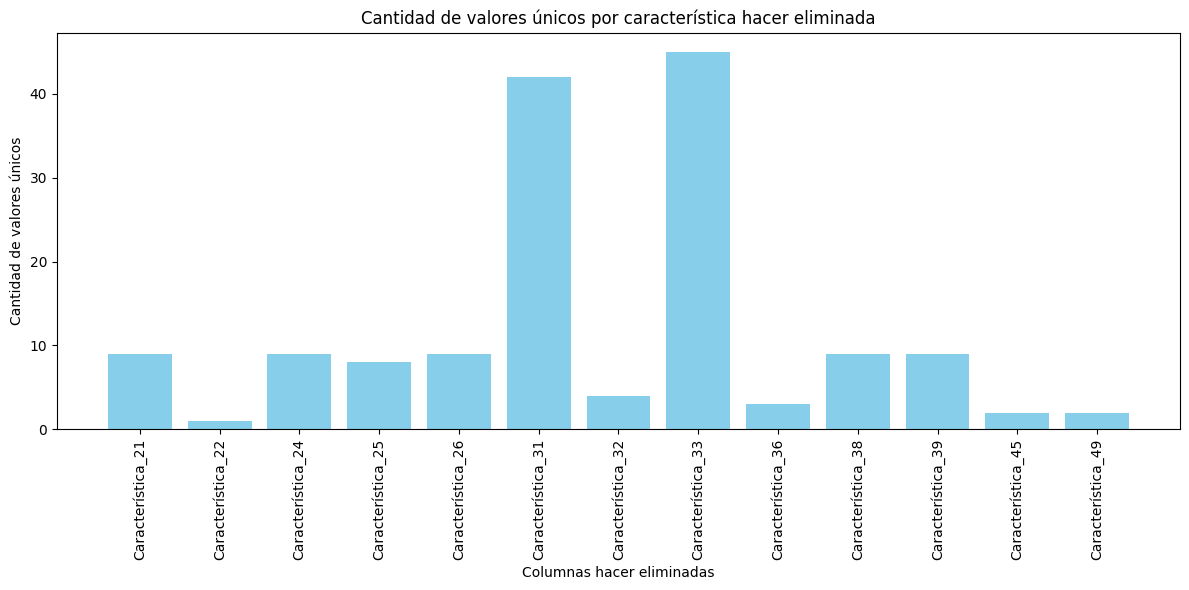

Número de columnas hacer eliminadas con el umbral (>= 5 % y < 30 %)

Característica_0: 238 valores únicos
Característica_4: 179 valores únicos
Característica_9: 57 valores únicos
Característica_11: 59 valores únicos
Característica_12: 73 valores únicos
Característica_13: 107 valores únicos
Característica_14: 53 valores únicos
Característica_15: 91 valores únicos
Característica_18: 170 valores únicos
Característica_19: 53 valores únicos
Característica_20: 68 valores únicos
Característica_23: 92 valores únicos
Característica_30: 107 valores únicos
Característica_34: 141 valores únicos
Característica_35: 110 valores únicos
Característica_41: 220 valores únicos
Característica_47: 169 valores únicos


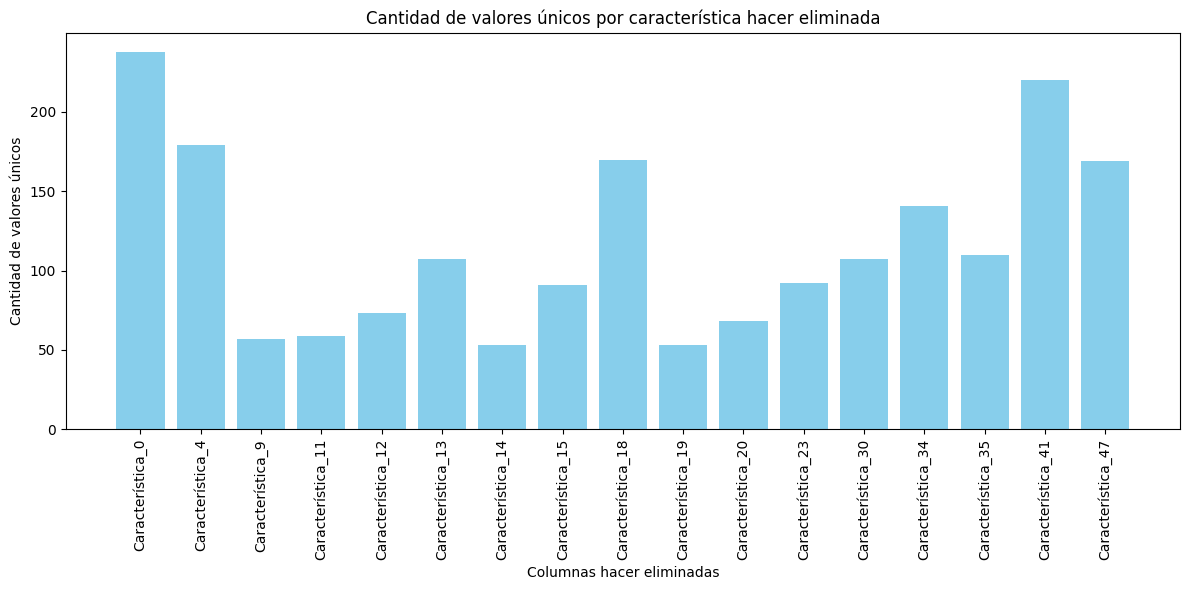

Número de columnas hacer eliminadas con el umbral (>= 30 % y < 80 %)

Característica_1: 297 valores únicos
Característica_5: 375 valores únicos
Característica_7: 618 valores únicos
Característica_8: 561 valores únicos
Característica_10: 577 valores únicos
Característica_27: 308 valores únicos
Característica_28: 447 valores únicos
Característica_29: 392 valores únicos
Característica_40: 388 valores únicos
Característica_42: 644 valores únicos
Característica_43: 649 valores únicos
Característica_44: 499 valores únicos
Característica_48: 286 valores únicos


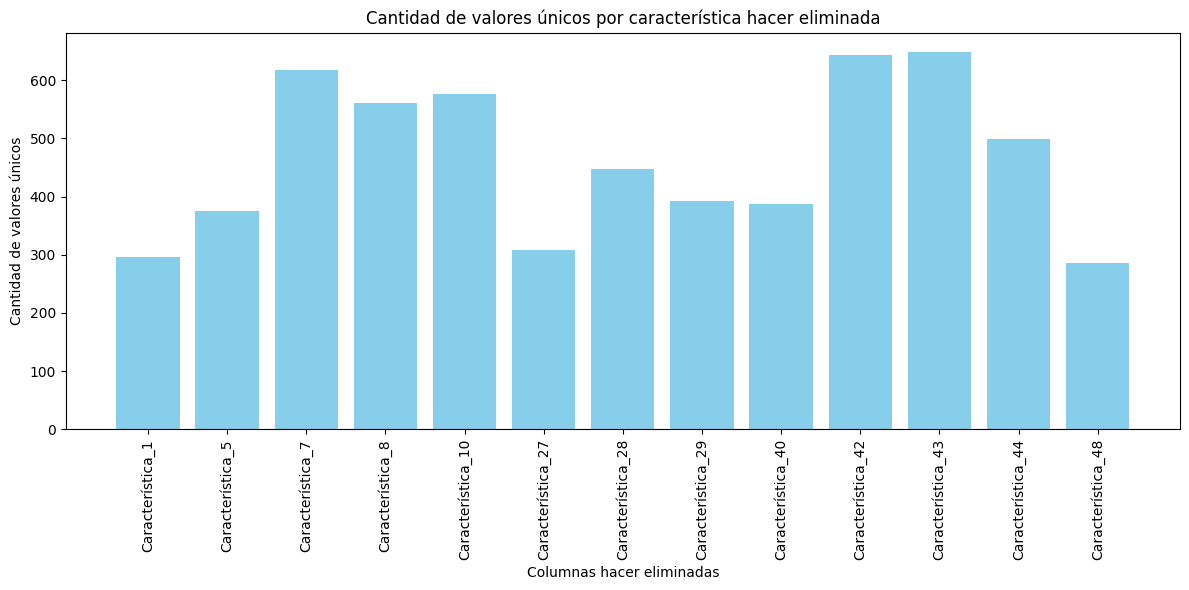

In [146]:
print("Número de columnas hacer eliminadas con el umbral (>= 0 % y < 5 %)\n")
# Llamar a la función para calcular la cantidad y columnas dependiendo la incidencia
df_retorno_filtrado, retorno_columnas_eliminadas = eliminar_columnas_incidencia_cantidad(df_Main, 0, 5)    
# Llamar a la función para graficar
graficar_unicos(retorno_columnas_eliminadas)

print("Número de columnas hacer eliminadas con el umbral (>= 5 % y < 30 %)\n")
# Llamar a la función para calcular la cantidad y columnas dependiendo la incidencia
df_retorno_filtrado, retorno_columnas_eliminadas = eliminar_columnas_incidencia_cantidad(df_Main, 5, 30)    
# Llamar a la función para graficar
graficar_unicos(retorno_columnas_eliminadas)

print("Número de columnas hacer eliminadas con el umbral (>= 30 % y < 80 %)\n")
# Llamar a la función para calcular la cantidad y columnas dependiendo la incidencia
df_retorno_filtrado, retorno_columnas_eliminadas = eliminar_columnas_incidencia_cantidad(df_Main, 30, 80)    
# Llamar a la función para graficar
graficar_unicos(retorno_columnas_eliminadas)



# Análisis de los úmbrales de incidencia
Se propuso analizar los siguientes umbrales de incidencia:
Mayor o igual  a 0 y menor que 5 
 5 % - 30 % y 30 % - 80 %.

* La primera gráfica correspondiente al intervalo entre mayor o igual  a 0 % y menor que 5% (>=0% y <5%),  podemos observar que la característica 31 y 33 tienen más de 40 valores únicos, mientras que las otras estan por debajo de 10 esto quiere decir que hay menos valores únicos en esta categoria, si la información almacenada correspondería a variables categóricas como sexo(hombre, mujer)serían muy útiles en modelos como árboles de decisión o regresión logística.

* En la segunda gráfica correspondiente al intervalo de mayor o igual a 5% y menor que 30 % (>=5% y <30%)podemos señalar que solo la característica 0 tiene 238 valores únicos, 4 características (4,18,41 y 47) estan entre 169 y 220 y el resto tiene 92 valores únicos. Se observa que tiene una baja variabilidad, para tomar la decisión de eliminar estas columnas primero se debería analizar que tipo de información almacenan y si van aportar valor a la investigación. 

* En la tercera gráfica correspondiente al intervale mayor o igual al 30% y menor que 80 % (>=30% y <80%) podemos decir que 5 características se encuentran entre 561 y 649 de valores únicos mientras 8 características se encuentrán por debajo de estas cantidades, podemos decir que tienen una mediana variabilidad y que esta información podría ser valiosa para el objeto de estudio.  

# 5️⃣ Visualiza la distribución de los valores (%) de las columnas filtradas
✅Mediante gráficos Barplot, histograma o similar

Columnas a eliminar según el umbral (>= 0 % y < 5 %)

Característica_21: 9 valores únicos → 0.96% del total
Característica_22: 1 valores únicos → 0.11% del total
Característica_24: 9 valores únicos → 0.96% del total
Característica_25: 8 valores únicos → 0.85% del total
Característica_26: 9 valores únicos → 0.96% del total
Característica_31: 42 valores únicos → 4.48% del total
Característica_32: 4 valores únicos → 0.43% del total
Característica_33: 45 valores únicos → 4.80% del total
Característica_36: 3 valores únicos → 0.32% del total
Característica_38: 9 valores únicos → 0.96% del total
Característica_39: 9 valores únicos → 0.96% del total
Característica_45: 2 valores únicos → 0.21% del total
Característica_49: 2 valores únicos → 0.21% del total


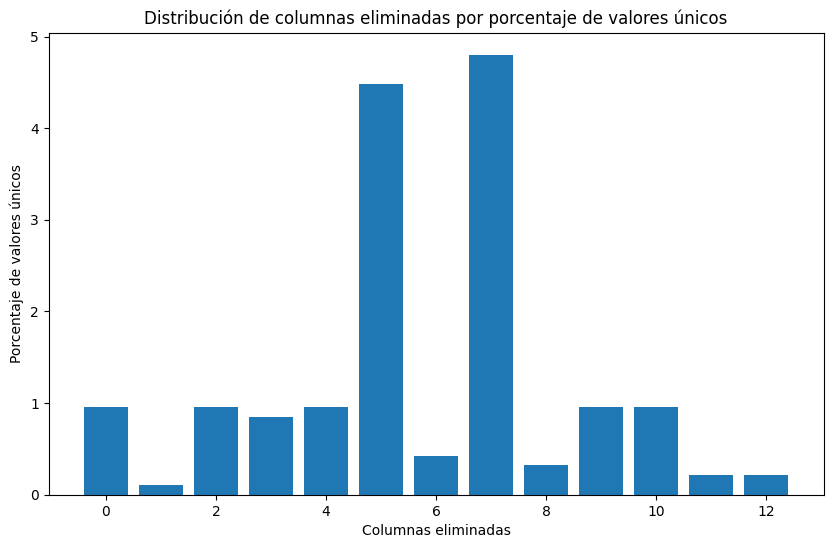

Columnas a eliminar según el umbral (>= 5 % y < 30 %)

Característica_0: 238 valores únicos → 25.40% del total
Característica_4: 179 valores únicos → 19.10% del total
Característica_9: 57 valores únicos → 6.08% del total
Característica_11: 59 valores únicos → 6.30% del total
Característica_12: 73 valores únicos → 7.79% del total
Característica_13: 107 valores únicos → 11.42% del total
Característica_14: 53 valores únicos → 5.66% del total
Característica_15: 91 valores únicos → 9.71% del total
Característica_18: 170 valores únicos → 18.14% del total
Característica_19: 53 valores únicos → 5.66% del total
Característica_20: 68 valores únicos → 7.26% del total
Característica_23: 92 valores únicos → 9.82% del total
Característica_30: 107 valores únicos → 11.42% del total
Característica_34: 141 valores únicos → 15.05% del total
Característica_35: 110 valores únicos → 11.74% del total
Característica_41: 220 valores únicos → 23.48% del total
Característica_47: 169 valores únicos → 18.04% del t

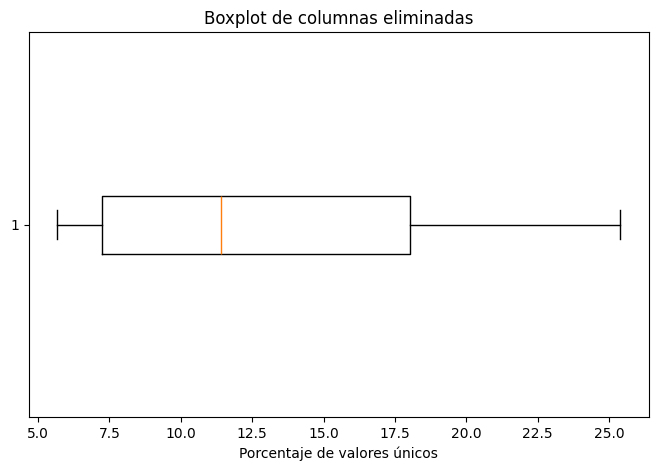

Columnas a eliminar según el umbral (>= 30 % y < 80 %)

Característica_1: 297 valores únicos → 31.70% del total
Característica_5: 375 valores únicos → 40.02% del total
Característica_7: 618 valores únicos → 65.96% del total
Característica_8: 561 valores únicos → 59.87% del total
Característica_10: 577 valores únicos → 61.58% del total
Característica_27: 308 valores únicos → 32.87% del total
Característica_28: 447 valores únicos → 47.71% del total
Característica_29: 392 valores únicos → 41.84% del total
Característica_40: 388 valores únicos → 41.41% del total
Característica_42: 644 valores únicos → 68.73% del total
Característica_43: 649 valores únicos → 69.26% del total
Característica_44: 499 valores únicos → 53.26% del total
Característica_48: 286 valores únicos → 30.52% del total


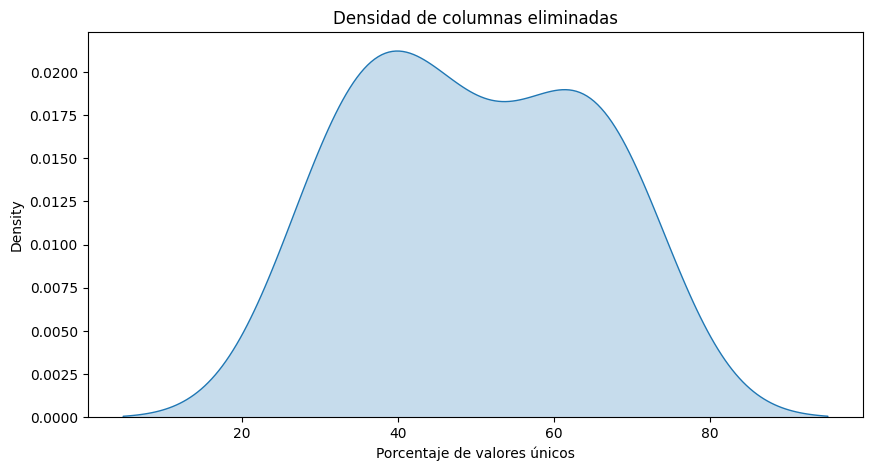

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Columnas a eliminar según el umbral (>= 0 % y < 5 %)\n")
# Llamar a la función para calcular el umbral (>= 0 % y <=5 %)")  
df_retorno_filtrado, retorno_columnas_eliminadas = eliminar_columnas_incidencia_porcentaje(df_Main, 0, 5)
# Grafico Barplot 
grafico1 = [float(p) for p in retorno_columnas_eliminadas.values()]
plt.figure(figsize=(10, 6))
plt.bar(range(len(grafico1)), grafico1)
plt.xlabel("Columnas eliminadas")
plt.ylabel("Porcentaje de valores únicos")
plt.title("Distribución de columnas eliminadas por porcentaje de valores únicos")
plt.show()

print("Columnas a eliminar según el umbral (>= 5 % y < 30 %)\n")
# Llamar a la función para calcular el umbral (>= 5 % y <=30 %)")  
df_retorno_filtrado, retorno_columnas_eliminadas = eliminar_columnas_incidencia_porcentaje(df_Main, 5, 30)
# Gráfico BoxPlot
cov_flotante = [float(p) for p in retorno_columnas_eliminadas.values()]
plt.figure(figsize=(8, 5))
plt.boxplot(cov_flotante, vert=False)
plt.xlabel("Porcentaje de valores únicos")
plt.title("Boxplot de columnas eliminadas")
plt.show()

print("Columnas a eliminar según el umbral (>= 30 % y < 80 %)\n")
# Llamar a la función para calcular el umbral (>= 30 % y <=80 %)")
df_retorno_filtrado, retorno_columnas_eliminadas = eliminar_columnas_incidencia_porcentaje(df_Main, 30, 80)

# Gráfico KDE plot curva de densidad suavizada
plt.figure(figsize=(10, 5))
sns.kdeplot(retorno_columnas_eliminadas, fill=True)
plt.xlabel("Porcentaje de valores únicos")
plt.title("Densidad de columnas eliminadas")
plt.show()



# 6️⃣ Varianza por columna
✅ Realiza un análisis de varianza por columna y comenta los resultados

Listado de características por varianza

Característica_5     1.467772e+13
Característica_8     6.670687e+07
Característica_46    4.698424e+07
Característica_35    2.724190e+07
Característica_1     3.732387e+06
Característica_40    1.003365e+06
Característica_41    5.117852e+05
Característica_24    3.751064e+05
Característica_2     3.599587e+05
Característica_42    2.854831e+05
Característica_3     2.733191e+05
Característica_16    9.261665e+04
Característica_17    2.331525e+04
Característica_43    1.839216e+04
Característica_34    9.056821e+03
Característica_0     4.221975e+03
Característica_10    3.777436e+03
Característica_4     2.057690e+03
Característica_37    9.976020e+02
Característica_21    5.261277e+02
Característica_38    4.833143e+02
Característica_39    1.915151e+02
Característica_6     1.617578e+02
Característica_47    1.084266e+02
Característica_44    2.529236e+01
Característica_26    1.574476e+01
Característica_28    1.310010e+01
Característica_7     1.288004e+01
Caracte

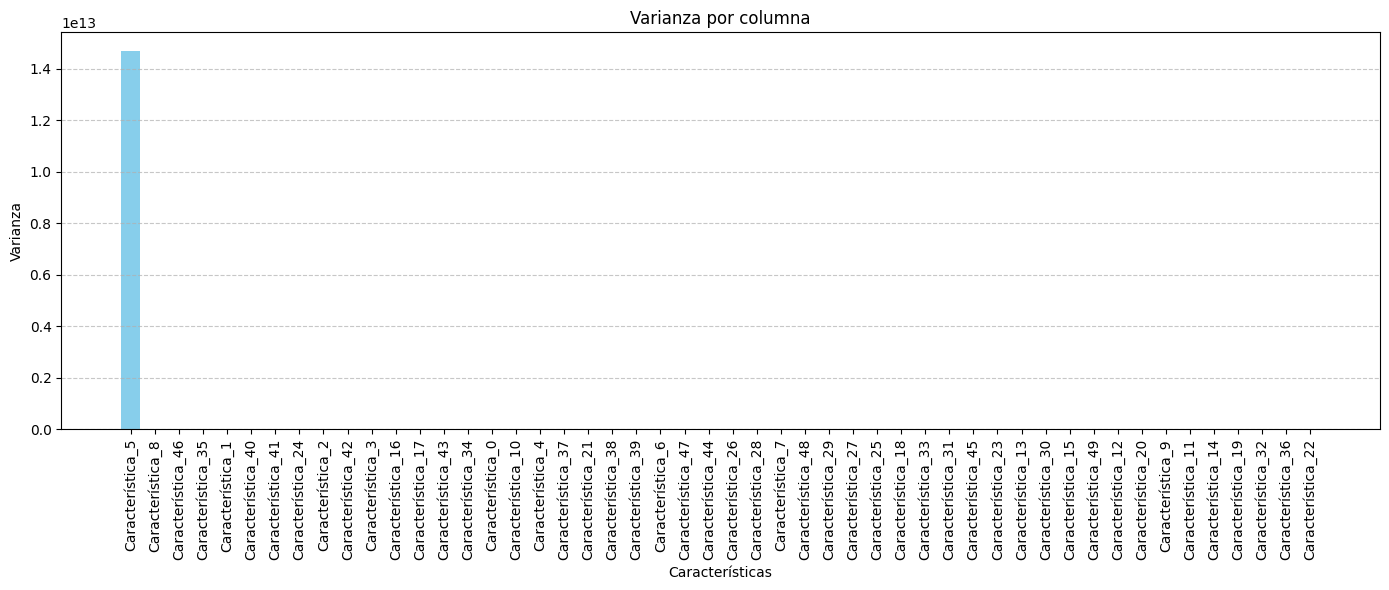

In [ ]:
import matplotlib.pyplot as plt
# Calcular varianza de cada columna numérica
varianzas = df_Main.var(numeric_only=True).sort_values(ascending=False)
# Mostrar las varianzas ordenadas de mayor a menor
print("Características por varianza ordenada de mayor a menor\n")
print(varianzas)
# Crear el gráfico
plt.figure(figsize=(14, 6))
plt.bar(varianzas.index, varianzas.values, color='skyblue')
plt.xticks(rotation=90)
plt.title("Varianza por columna")
plt.xlabel("Características")
plt.ylabel("Varianza")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Analisis varianza
* Al analizar el gráfico se puede observar que la mayoría de las columnas tienen una varianza muy baja, casi cercana a cero, posiblemente contienen valores casi constantes, lo que significa que aportan poca o ninguna información al modelo.
* La columna "Característica_5" tiene una varianza extremadamente alta, del orden de 1e13, lo cual la hace una variable dominante en términos de escala y dispersión, por tal motivo se debería revisar si no esta en una escala diferente al resto, probablemente necesite normalización o estandarización para evitar que domine al entrenar un modelo de machine learning.

